In [1]:
# (Si estás en Google Colab, usualmente no necesitas instalar nada adicional,
# pero si estás en otro entorno, asegúrate de tener scikit-learn instalado)
# !pip install scikit-learn

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score<


In [5]:
data = fetch_california_housing()


In [6]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['Target'] = data.target  # agregamos la columna objetivo
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
X = df.drop('Target', axis=1)  # todas las columnas menos 'Target'
y = df['Target']               # la columna objetivo


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,   # 20% para test
    random_state=42  # semilla para reproducibilidad
)


In [9]:
model = LinearRegression()


In [10]:
model.fit(X_train, y_train)


LinearRegression()

In [11]:
y_pred = model.predict(X_test)


In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.5558915986952444
R^2 Score: 0.5757877060324508


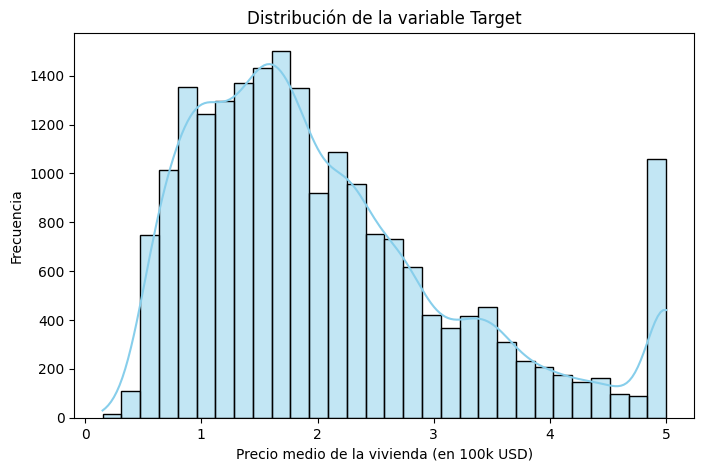

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Target'], kde=True, color='skyblue', bins=30)
plt.title('Distribución de la variable Target')
plt.xlabel('Precio medio de la vivienda (en 100k USD)')
plt.ylabel('Frecuencia')
plt.show()


In [15]:
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


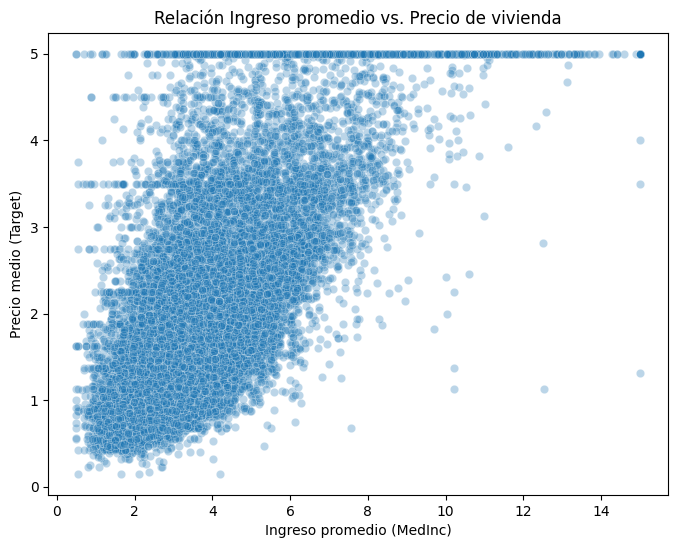

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MedInc', y='Target', data=df, alpha=0.3)
plt.title('Relación Ingreso promedio vs. Precio de vivienda')
plt.xlabel('Ingreso promedio (MedInc)')
plt.ylabel('Precio medio (Target)')
plt.show()


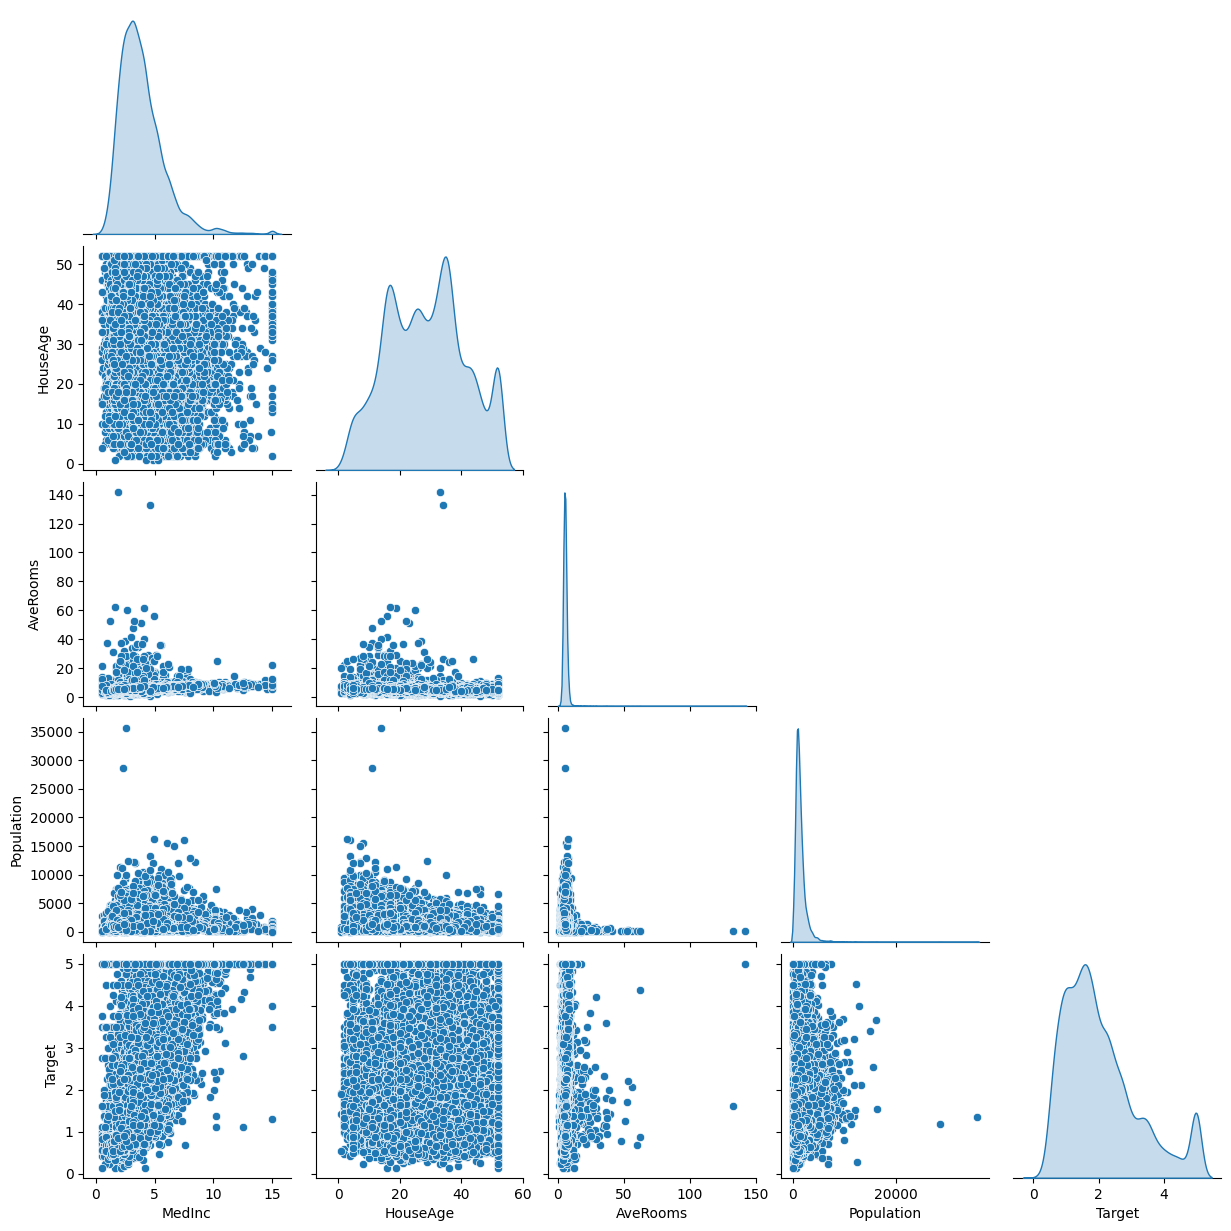

In [17]:
cols_to_plot = ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'Target']

sns.pairplot(df[cols_to_plot], diag_kind='kde', corner=True)
plt.show()


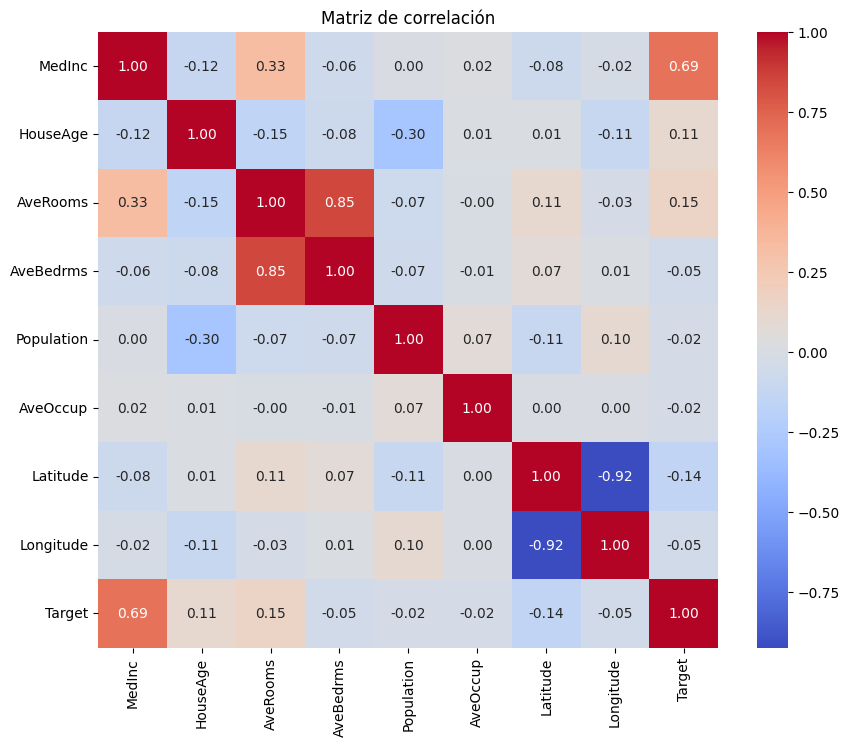

In [18]:
plt.figure(figsize=(10,8))

# Calculamos la correlación
corr_matrix = df.corr()

# Creamos el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


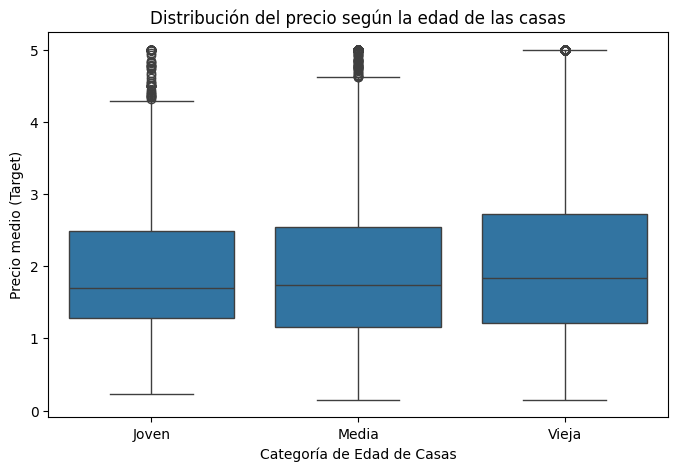

In [19]:
# Creamos una nueva columna "HouseAgeCat" por tramos
df['HouseAgeCat'] = pd.cut(df['HouseAge'], bins=[0, 10, 25, 52],
                           labels=['Joven','Media','Vieja'])

plt.figure(figsize=(8,5))
sns.boxplot(x='HouseAgeCat', y='Target', data=df)
plt.title('Distribución del precio según la edad de las casas')
plt.xlabel('Categoría de Edad de Casas')
plt.ylabel('Precio medio (Target)')
plt.show()


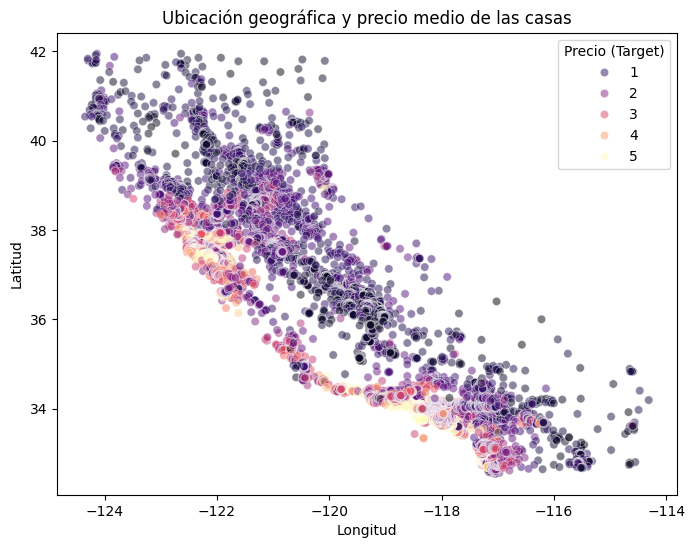

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Longitude', y='Latitude',
    data=df,
    hue='Target',     # color según el precio de la vivienda
    palette='magma',
    alpha=0.5
)
plt.title('Ubicación geográfica y precio medio de las casas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Precio (Target)')
plt.show()


In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [22]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.255553781221915
R^2 Score: 0.804981661858749
